In [220]:
import pandas as pd
import matplotlib.pyplot as plt


In [221]:
#Zadanie 1 utworz jeden DataFrame
plant1 = pd.read_csv('C:/Users/dl7le/Documents/JiBAD/pythonLab8/Plant_1_Generation_Data.csv')
plant2 = pd.read_csv('C:/Users/dl7le/Documents/JiBAD/pythonLab8/Plant_2_Generation_Data.csv')
frame = pd.concat([plant1,plant2])

In [222]:
frame.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [223]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE_TIME    136476 non-null  object 
 1   PLANT_ID     136474 non-null  float64
 2   SOURCE_KEY   136476 non-null  object 
 3   DC_POWER     136475 non-null  float64
 4   AC_POWER     136475 non-null  float64
 5   DAILY_YIELD  136475 non-null  float64
 6   TOTAL_YIELD  136474 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.3+ MB


In [224]:
frame.tail()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001.0,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [225]:
# Zadanie 2 odfilturj wiersze z brakujacymi danmymi 

In [226]:
frame.isna().sum()

DATE_TIME      0
PLANT_ID       2
SOURCE_KEY     0
DC_POWER       1
AC_POWER       1
DAILY_YIELD    1
TOTAL_YIELD    2
dtype: int64

In [227]:
frame.dropna(inplace=True)

In [228]:
frame.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [229]:
frame.dtypes

DATE_TIME       object
PLANT_ID       float64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [230]:
frame['DATE_TIME'] = pd.to_datetime(frame['DATE_TIME'])

In [231]:
frame.set_index(['PLANT_ID','SOURCE_KEY','DATE_TIME'],inplace=True)

In [232]:
frame.head()

DC_POWER  AC_POWER  DAILY_YIELD  \
PLANT_ID  SOURCE_KEY      DATE_TIME                                     
4135001.0 1BY6WEcLGh8j5v7 2020-05-15       0.0       0.0          0.0   
          1IF53ai7Xc0U56Y 2020-05-15       0.0       0.0          0.0   
          3PZuoBAID5Wc2HD 2020-05-15       0.0       0.0          0.0   
          7JYdWkrLSPkdwr4 2020-05-15       0.0       0.0          0.0   
          McdE0feGgRqW7Ca 2020-05-15       0.0       0.0          0.0   

                                      TOTAL_YIELD  
PLANT_ID  SOURCE_KEY      DATE_TIME                
4135001.0 1BY6WEcLGh8j5v7 2020-05-15    6259559.0  
          1IF53ai7Xc0U56Y 2020-05-15    6183645.0  
          3PZuoBAID5Wc2HD 2020-05-15    6987759.0  
          7JYdWkrLSPkdwr4 2020-05-15    7602960.0  
          McdE0feGgRqW7Ca 2020-05-15    7158964.0

In [233]:
# 3. Wykres AC_POWER dla wybranego generatora w wybranym tygodniu

In [234]:
frame['TOTAL_YIELD'].idxmax()

(4136001.0, '9kRcWv60rDACzjR', Timestamp('2020-06-17 19:00:00'))

<ipython-input-235-ed003ab2e371>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(frame.loc[4136001.0,'9kRcWv60rDACzjR']['AC_POWER']['2020-05-20':'2020-05-27'],


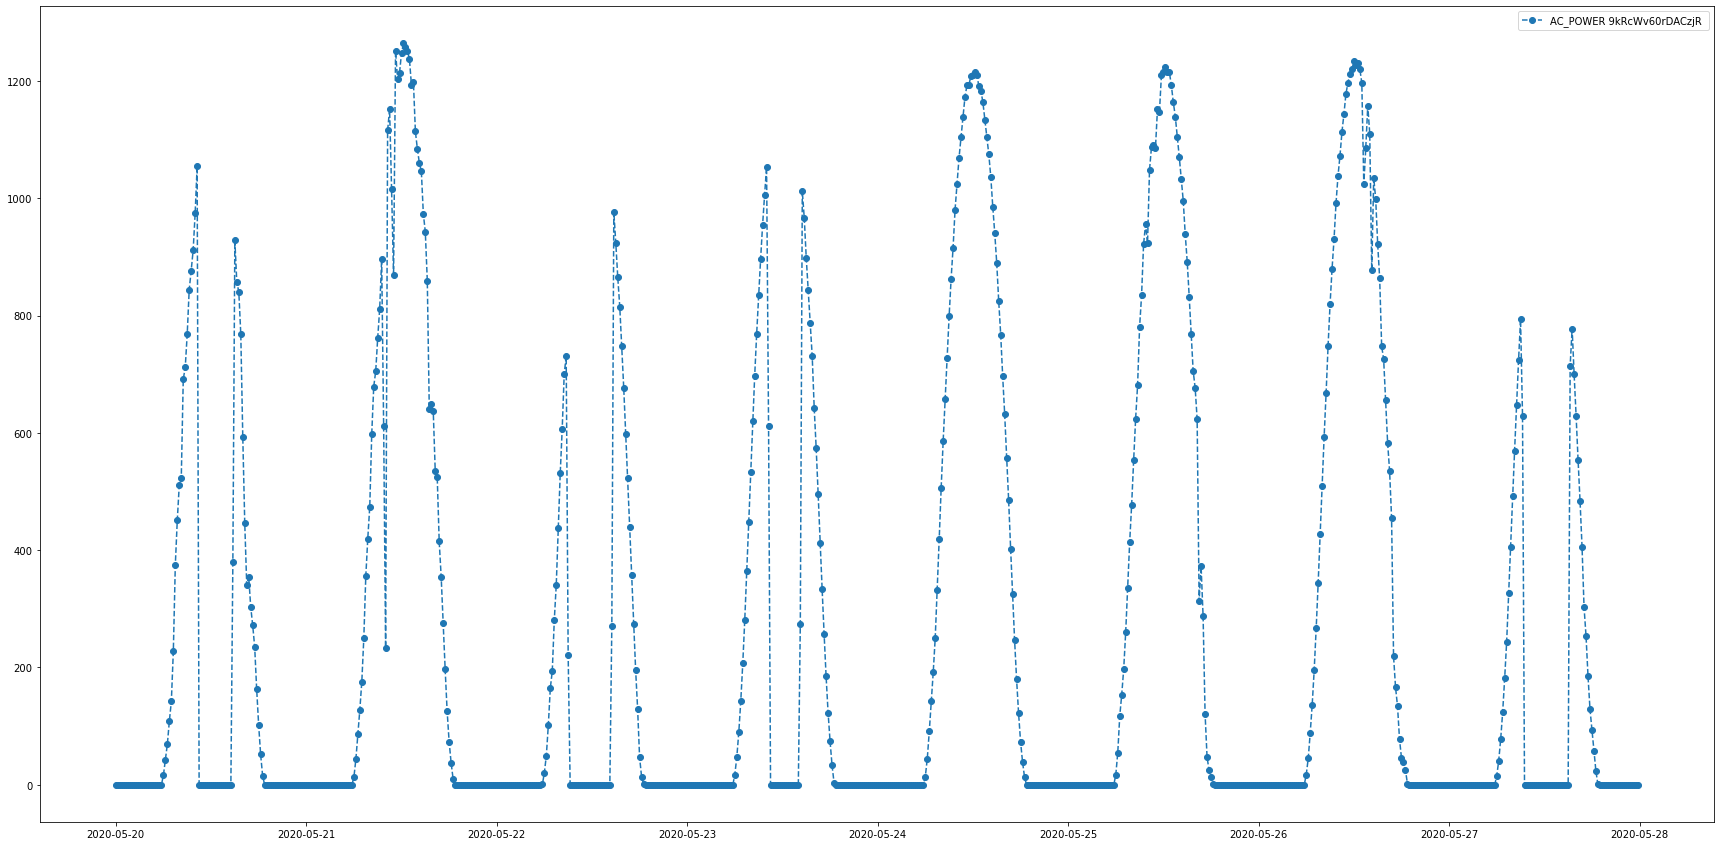

In [235]:
plt.figure(figsize=(30,15))
plt.plot(frame.loc[4136001.0,'9kRcWv60rDACzjR']['AC_POWER']['2020-05-20':'2020-05-27'],
        'o--', label = 'AC_POWER 9kRcWv60rDACzjR ')
plt.legend()
plt.show()

In [236]:
# 4. Na tym samym wykresie pokaz srednie AC_POWER dla wszystkich generatorów

<ipython-input-237-343c2dad8e84>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(frame.loc[4136001.0,'9kRcWv60rDACzjR']['AC_POWER']['2020-05-20':'2020-05-27'],


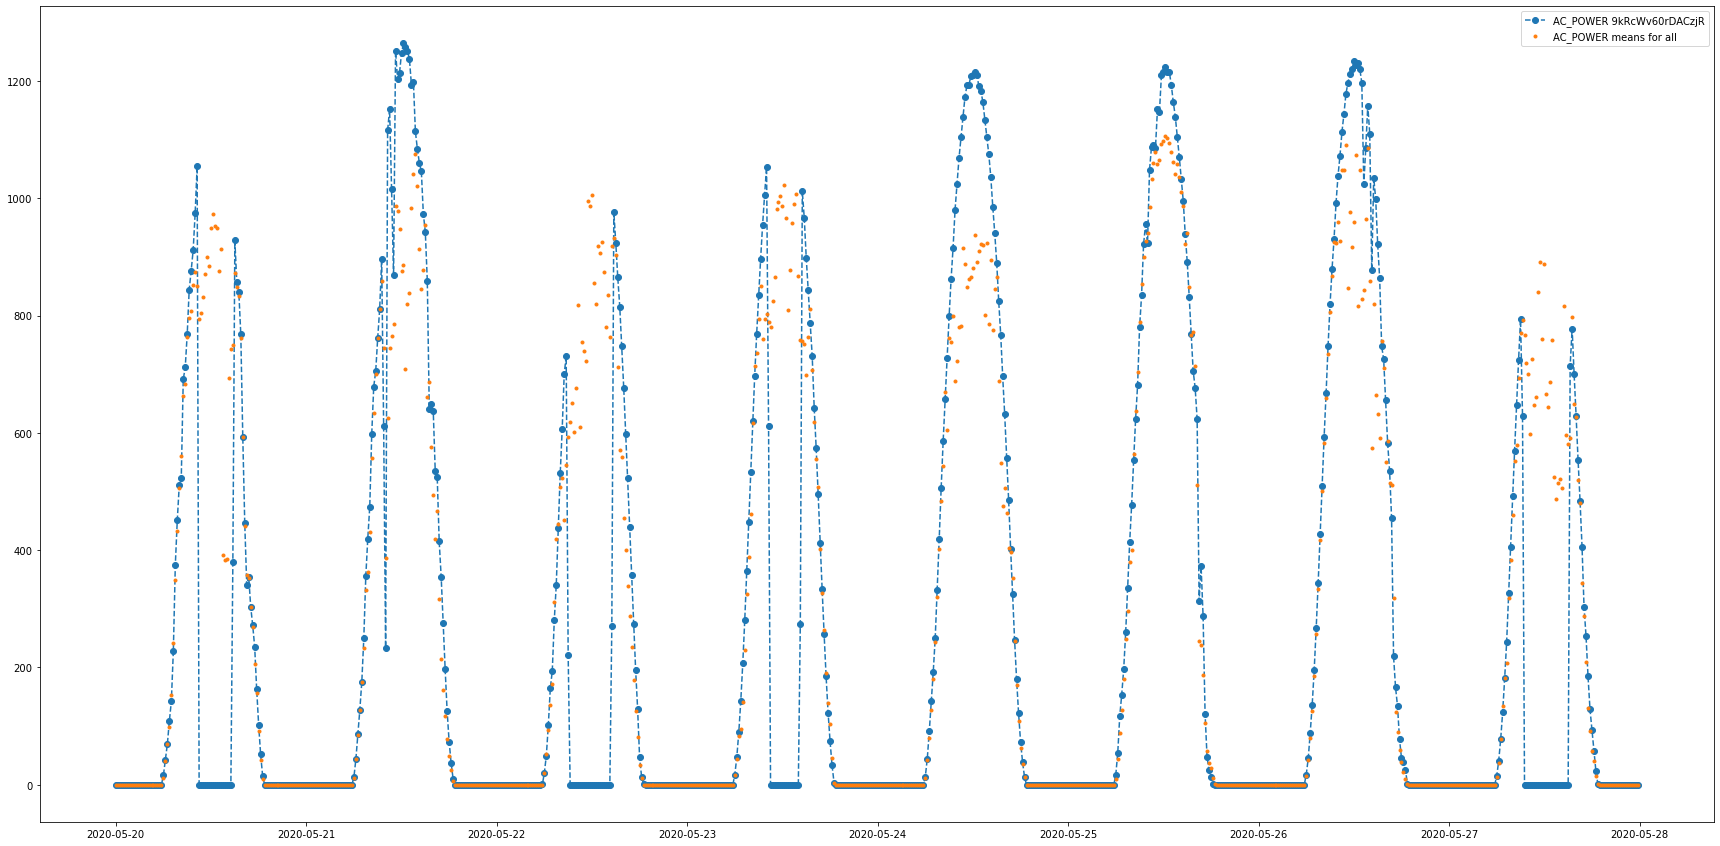

In [237]:
plt.figure(figsize=(30,15))
plt.plot(frame.loc[4136001.0,'9kRcWv60rDACzjR']['AC_POWER']['2020-05-20':'2020-05-27'],
        'o--', label = 'AC_POWER 9kRcWv60rDACzjR')
plt.plot(frame.groupby(level=2).mean()['AC_POWER']['2020-05-20':'2020-05-27'],'.',label='AC_POWER means for all')
plt.legend()
plt.show()

In [238]:
# 5. Znajdź przypadki, kiedy AC_POWER któregoś z generatorów było na poziomie < 80% średniej. Których generatorów najczęściej to dotyczy?

In [239]:
result = frame[frame["AC_POWER"] < frame['AC_POWER'].mean()*0.8]

In [240]:
result.head()

DC_POWER  AC_POWER  DAILY_YIELD  \
PLANT_ID  SOURCE_KEY      DATE_TIME                                     
4135001.0 1BY6WEcLGh8j5v7 2020-05-15       0.0       0.0          0.0   
          1IF53ai7Xc0U56Y 2020-05-15       0.0       0.0          0.0   
          3PZuoBAID5Wc2HD 2020-05-15       0.0       0.0          0.0   
          7JYdWkrLSPkdwr4 2020-05-15       0.0       0.0          0.0   
          McdE0feGgRqW7Ca 2020-05-15       0.0       0.0          0.0   

                                      TOTAL_YIELD  
PLANT_ID  SOURCE_KEY      DATE_TIME                
4135001.0 1BY6WEcLGh8j5v7 2020-05-15    6259559.0  
          1IF53ai7Xc0U56Y 2020-05-15    6183645.0  
          3PZuoBAID5Wc2HD 2020-05-15    6987759.0  
          7JYdWkrLSPkdwr4 2020-05-15    7602960.0  
          McdE0feGgRqW7Ca 2020-05-15    7158964.0